# Vignnette

This vignette serves as brief tutorial on the basic functionality of the implementation of a discrete time, discrete space Hidden Markov Model used for Latent Trajectory Analysis in the paper. This includes the tools for simulation, estimation, and visualisation

## Simulation

Let's specify a simulation of a $3$ state, fully connected HMM which outputs 4 binary observations, 32 continuous observation. We make sure that initial state probabilities are parameterised by a multinomial function using covariates $x_3$ and $x_5$, while transition probabilities use $x_8$.

In [10]:
include("src/LTA.jl")
using .LTA

sim_hyper = LTA.SimHyperParams(
    param_seed = 1,

	N = 5000,

	n_obs_tup = (
		bernoulli = 4,
		gaussian = 2
	),
	n_states = 3,
	ref_state = 1,
	covariate_tup = (
		initial = ["x3", "x5"], 
		trans = ["x8"], 
		em = []), 
	sim_no = "",
	comments = ""
)
sim_params = LTA.gen_params_from_hyper_params(sim_hyper)
keys(sim_params.model_params)

(:beta_initial, :beta_transition, :rho_initial, :rho_trans, :emissions)

Taking a look at the paramters which were randomly generated, we see the three most important components:
- the $\beta$ coefficients which generate the initial state probability vector, 
- the $\beta$ coefficients which generate the transition probabilities between states
- components which construct the paramters used for emission (e.g means $\mu$ used for the Guassian distribution)

Let's simulate 5 timepoints now:

In [11]:
sim_output = LTA.run_simulation(
	sim_params;
	T = 5
	)

Main.LTA.SimulationOutput(Main.LTA.SimParams(Main.LTA.SimHyperParams(1, 5000, (bernoulli = 4, gaussian = 2), 3, (initial = ["x3", "x5"], trans = ["x8"], em = Any[]), 1, "", ""), ["x1", "x2", "x3", "x4", "x5", "x6", "x7", "x8", "x9", "x10", "x11", "x12", "x13", "x14", "x15", "x16", "x17", "x18", "x19", "x20"], [1.0 0.0 … 1.0 1.0; 1.0 0.0 … 0.0 1.0; … ; 1.0 0.0 … 0.0 1.0; 1.0 0.0 … 1.0 0.0], (beta_initial = [0.0 0.0; 1.4977475724484632 0.5009564773194146; 1.6962803477126407 0.9490147857291875], beta_transition = [0.0 0.0; 1.1080366793357879 1.3534306129330096; -0.7947585858236712 0.0962348753912936;;; 0.0 0.0; 1.7260616566505886 0.045930602097062234; -1.8230879061936962 1.2118439932583556;;; 0.0 0.0; -1.6572934310701033 -0.39561650164893347; -0.5501469182786991 0.02978154473800121], rho_initial = [-0.5328143502403027, 0.09551429913764675], rho_trans = [1.2467936199834462], emissions = (beta_bernoulli = [-1.950569182261888; 1.5771468899828776; 1.5234034615163772;;; 1.0770107622661707; 1.4

## Estimation

We can now estimate the parameters. Here we specify 2 multistarts, where each run is optimised using a BFGS scheme, using a $\lambda = 10$ penalty. The object returned contains a list of the optimisation details.

In [12]:
est_output = LTA.run_estimation(
    sim_output;
    est_seed = 2,
    meth = "BFGS",
    n_starts = 2,
    lambda = 10.0,
	calculate_hessian = false,

    # kwargs for the optimisation run from Optim can be passed here
    iterations = 100
)


Estimating
Iter     Function value   Gradient norm 
Iter     Function value   Gradient norm 
     0     1.062136e+05     6.991434e+04
     0     1.199245e+05     5.377148e+04
 * time: 0.00013494491577148438
 * time: 0.08246707916259766
     1     8.610822e+04     1.983733e+04
 * time: 8.038774013519287
     1     7.056673e+04     2.254840e+04
 * time: 8.271157026290894
     2     5.966462e+04     1.511013e+04
 * time: 13.659605979919434
     2     7.236862e+04     1.621264e+04
 * time: 15.14025092124939
     3     4.824756e+04     1.561940e+04
 * time: 19.295559883117676
     3     6.508157e+04     1.785520e+04
 * time: 21.300167083740234
     4     4.265628e+04     1.160717e+04
 * time: 25.81170892715454
     4     5.260828e+04     2.887849e+04
 * time: 27.660940885543823
     5     4.045058e+04     9.273789e+03
 * time: 30.84124207496643
     5     4.151189e+04     1.028977e+04
 * time: 35.34315896034241
     6     3.589019e+04     9.659170e+03
 * time: 37.47654891014099
     6     

Main.LTA.EstimationOutput(Main.LTA.SimulationOutput(Main.LTA.SimParams(Main.LTA.SimHyperParams(1, 5000, (bernoulli = 4, gaussian = 2), 3, (initial = ["x3", "x5"], trans = ["x8"], em = Any[]), 1, "", ""), ["x1", "x2", "x3", "x4", "x5", "x6", "x7", "x8", "x9", "x10", "x11", "x12", "x13", "x14", "x15", "x16", "x17", "x18", "x19", "x20"], [1.0 0.0 … 1.0 1.0; 1.0 0.0 … 0.0 1.0; … ; 1.0 0.0 … 0.0 1.0; 1.0 0.0 … 1.0 0.0], (beta_initial = [0.0 0.0; 1.4977475724484632 0.5009564773194146; 1.6962803477126407 0.9490147857291875], beta_transition = [0.0 0.0; 1.1080366793357879 1.3534306129330096; -0.7947585858236712 0.0962348753912936;;; 0.0 0.0; 1.7260616566505886 0.045930602097062234; -1.8230879061936962 1.2118439932583556;;; 0.0 0.0; -1.6572934310701033 -0.39561650164893347; -0.5501469182786991 0.02978154473800121], rho_initial = [-0.5328143502403027, 0.09551429913764675], rho_trans = [1.2467936199834462], emissions = (beta_bernoulli = [-1.950569182261888; 1.5771468899828776; 1.5234034615163772;

## Results

After completing the estimation, the est_output object can give details related to the optimisation run. What is of most interest is usually are the converged parameters, est_output.fitted_model_params

In [13]:
est_output.sim_output.sim_params.model_params

(beta_initial = [0.0 0.0; 1.4977475724484632 0.5009564773194146; 1.6962803477126407 0.9490147857291875], beta_transition = [0.0 0.0; 1.1080366793357879 1.3534306129330096; -0.7947585858236712 0.0962348753912936;;; 0.0 0.0; 1.7260616566505886 0.045930602097062234; -1.8230879061936962 1.2118439932583556;;; 0.0 0.0; -1.6572934310701033 -0.39561650164893347; -0.5501469182786991 0.02978154473800121], rho_initial = [-0.5328143502403027, 0.09551429913764675], rho_trans = [1.2467936199834462], emissions = (beta_bernoulli = [-1.950569182261888; 1.5771468899828776; 1.5234034615163772;;; 1.0770107622661707; 1.4171734221829242; -0.6565746628981595;;; 0.06935046601853934; -1.8177658869321194; 0.4499403910700597;;; -0.30569545122641095; -1.0422092494352828; -0.16632145809138965], beta_gaussian = (means = [0.7882858427169706 -1.1133024566073306; 0.3763251907944162 0.19644684878641908; -0.024929178133683456 -0.5978663145750528], stds = [-2.9834503022620362 -2.4251750248429174; -2.35688990561417 -2.378

## Plotting

Using the plotting tools, you can quickly inspect the various parameters in est_output.fitted_model_params and how different optimisation run result in different models

### Initial State Distributions

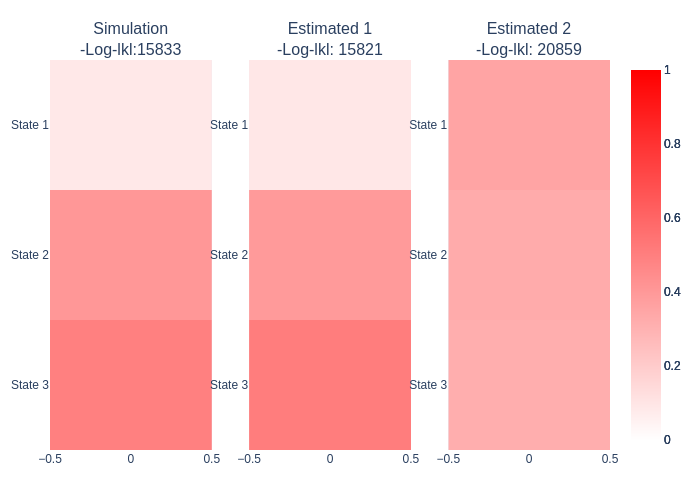

In [14]:
LTA.compare_initial_heatmaps(est_output)

### Bernoulli Emissions

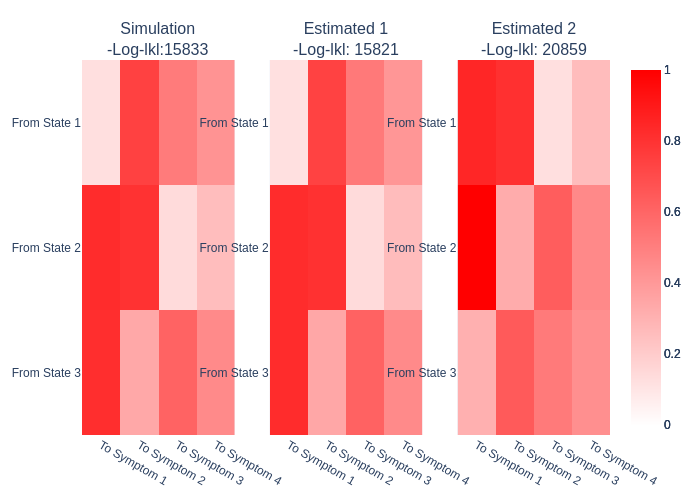

In [15]:
LTA.compare_bernoulli_heatmaps(est_output)

### Gaussian Emissions

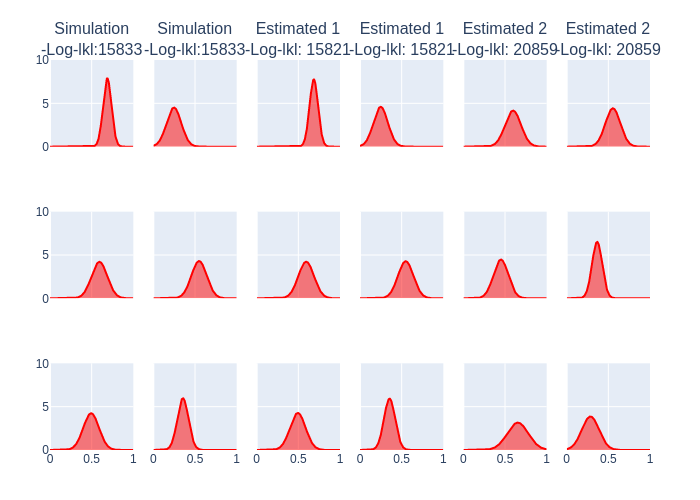

In [16]:
LTA.compare_gaussian_pdf(est_output)

### Transition Probabilities

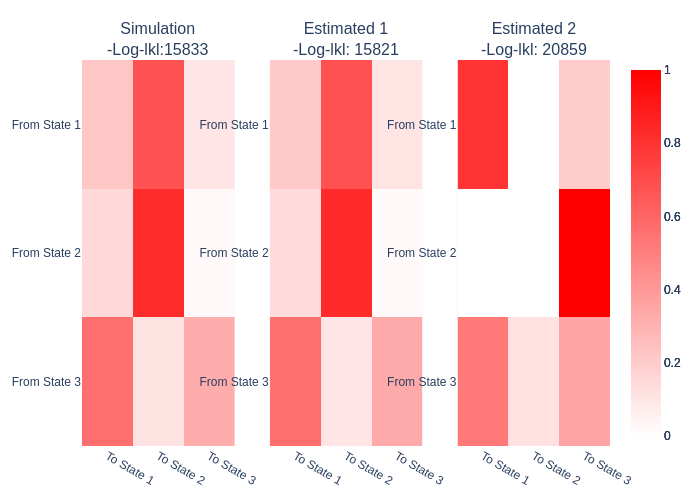

In [17]:
LTA.compare_trans_heatmaps(est_output)

### Covariate Impact

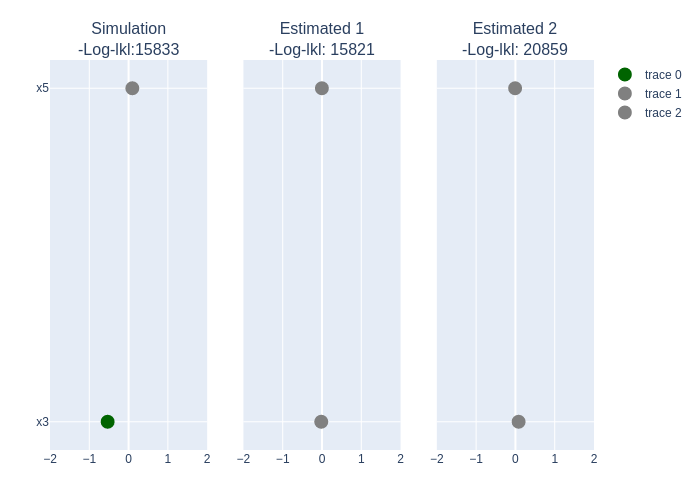

In [18]:
LTA.compare_rhos(est_output)

We see that the first estimation was succesfully able to recover the correct model parameters!